<a href="https://colab.research.google.com/github/harrisuddin/F20DL/blob/main/p_6_2_ANN_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification using Artificial Neural Network And CNN
Based on TensorFlow Core Tutorials https://www.tensorflow.org/tutorials/keras/classification

In [35]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [36]:
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import numpy as np
from tensorflow import keras
import requests
import io
import pandas as pd
from io import BytesIO

# Load Data Fashion MNIST

In [37]:
X_url = "https://raw.githubusercontent.com/harrisuddin/F20DL/main/smiley_X.npy"
y_url = "https://raw.githubusercontent.com/harrisuddin/F20DL/main/smiley_y.npy"

#bnb_url = "https://raw.githubusercontent.com/harrisuddin/F20DL/main/Airbnb_Open_Data.csv"
#bnb_download = requests.get(bnb_url).content

X_download = requests.get(X_url).content
y_download = requests.get(y_url).content
#print(X_download)


X = np.load(BytesIO(X_download))
y = np.load(BytesIO(y_download))

x_train, X_test = X, X
y_train, y_test = y, y

#X = np.load(X_download)
#y = np.load(y_download)

#df = pd.DataFrame(eval, X_download)
x_train.shape = (144, 9, 9)
x_train.shape

(144, 9, 9)

In [38]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

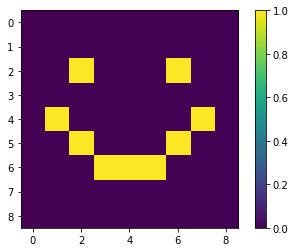

In [39]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [40]:
print(y_train[0])

0.0


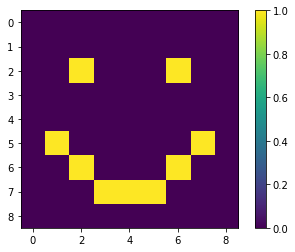

In [41]:
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

In [42]:
print(x_train[2])

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [43]:
print(y_train[2])

0.0


# Normalizing

In [44]:
x_train  = x_train / 255.0
x_test = x_test / 255.0

TypeError: ignored

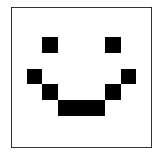

In [45]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [46]:
x_train.shape #28*28=784

(144, 9, 9)

# Building an ANN model

In [50]:

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(9, 9)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Relu ```if X>0 return X, else return 0```

softmax turns a set of predicted probability to sets of 0 and 1, so it is easy to find the highest probability 

In [52]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


If the labels are one-hot-encoded categorical cross-entropy and if it is not sparse categorical cross-entropy

# Training the Model 

In [53]:
model.fit(x=x_train,y=y_train,epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 6ms/step - loss: 2.2931 - accuracy: 0.4444
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 2.2646 - accuracy: 0.5625
Epoch 3/10
5/5 [==============================] - 0s 3ms/step - loss: 2.2323 - accuracy: 0.5069
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 2.1951 - accuracy: 0.5347
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 2.1528 - accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 2.1042 - accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 0s 3ms/step - loss: 2.0490 - accuracy: 0.5000
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 1.9873 - accuracy: 0.5000
Epoch 9/10
5/5 [==============================] - 0s 3ms/step - loss: 1.9189 - accuracy: 0.5000
Epoch 10/10
5/5 [==============================] - 0s 3ms/step - loss: 1.8447 - accuracy: 0.5000


# Evaluate

In [54]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)

ValueError: ignored

verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar.

# Prediction

In [ ]:
classifications = model.predict(x_test)

In [ ]:
print(classifications[3])


In [ ]:
np.argmax(classifications[3])

In [ ]:
np.max(classifications[3])

In [ ]:
class_names[np.argmax(classifications[3])]

In [ ]:
plt.imshow(x_test[3])
plt.colorbar()
plt.grid(False)

In [ ]:

def plot_value_array(i, predictions_array, true_label):
    
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  y_test)
plt.show()

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  y_test)
plt.show()

In [ ]:
num_rows = 15
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, classifications[i], y_test, x_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, classifications[i], y_test)
plt.tight_layout()
plt.show()

# Building the CNN Model

In [ ]:
x_train=x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train.shape #28*28=784

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

If the labels are one-hot-encoded categorical cross-entropy and if it is not sparse categorical cross-entropy

In [ ]:
model.fit(x_train, y_train, epochs=5)

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc)

In [ ]:
classifications = model.predict(x_test)

In [ ]:
print(classifications[3])

In [ ]:
np.argmax(classifications[3])

In [ ]:
np.max(classifications[3])

In [ ]:
class_names[np.argmax(classifications[3])]

In [ ]:
plt.imshow(x_test[3].reshape(28,28))
plt.colorbar()
plt.grid(False)

# Visualise Layers

In [ ]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [ ]:
plt.imshow(x_train[FIRST_IMAGE].reshape(28,28))
plt.colorbar()
plt.grid(False)

In [ ]:
plt.imshow(x_train[SECOND_IMAGE].reshape(28,28))
plt.colorbar()
plt.grid(False)

In [ ]:
plt.imshow(x_train[THIRD_IMAGE].reshape(28,28))
plt.colorbar()
plt.grid(False)